<b> <center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>
<b> <center>ГОРОДА МОСКВЫ</center>
<b> <center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>
<b> <center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>
<b> <center>«ПРОФЕССИОНАЛ»</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<b> <center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Анализ данных с использованием Python» </center>
<center> (на примере анализа данных миграционных потоков в Канаду) </center> 
<center>слушателя Юркина Вячеслава Викторовича<br>группы № 0859 </center>
 <center>по программе профессиональной переподготовки </center>
<center> «Аналитик данных» </center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<b> <center> Москва, 2022

<b> Цель исследования:

Необходимо найти факторы и закономерности, влияющие на размеры миграции в Канаду, а также оценить из степень воздействия. Кроме, того выявить аномалии в статистических данных, проанализировать и объяснить их.

Выполнение задачи предполагает:<br>
<a href=#1>1.  Предобработка данных и изучение общей информации</a><br>
<a href=#1>2.  Подготовка данных</a><br>
<a href=#2>3.  Исследовательский анализ данных</a><br>
<a href=#3>4.  Построение интерактивной карты миграции в Канаду с привязкой к странам.</a><br>
<a href=#4>5.  Исследование статистических показателей.</a><br>
<a href=#5>6.  Проверка гипотезы.</a><br>
<a href=#6>7.  Выводы</a><br>

Цель этого проекта — выявить, какие признаки больше всего влияют на масштаб миграции в Канаду. Для анализа используется набор данных из Kaggle, крупнейшего в мире сообщества специалистов по данным и машинному обучению. Набор данных состоит из 39 признаков (35 числовых признаков и 4 категориальных признаков). 

#### Столбцы данных

- Country — название страны.
- Continent — название континента.
- Region — географический регион.
- DevName — категория страны по уровню развития (развитая или развивающаяся).
- 1980-2013 — данные по миграции из каждой страны в Канаду с разбивкой по годам с 1980 г. по 2013 г.
- Total — общее число переехавших жить в Канаду людей за 33 года с разбивкой по странам.


### Шаг 1. Предобработка данных и изучение общей информации

### Шаг 2. Подготовка данных
а) изменение названия колонок (привести к нижнему регистру), а также изменение индексов датафрейма; 
<br>б) удаление ненужных для последующего анализа колонок;
<br>в) визуализация наличия пропусков;
<br>г) работа с дубликатами;
<br>д) внесение новой колонки "color".

### Шаг 3. Провести исследовательский анализ данных
а) рассчёт абсолютных и средних показателей миграционных потоков в Канаду по континентам;
<br>б) выяснение показателей иммиграции в Канаду из Алжира и построение линейного графика;
<br>в) определение для каждого континента страны с наибольшим числом мигрировавших в Канаду граждан;
<br>г) построение сводного линейного графика миграции в Канаду из лидирующих по этому показателю стран каждого континента;
<br>д) построение графика «ящик с усами»  для количества мигрантов из Алжира, Египта, Российской Федерации, Китая, Индии и Великобритании;
<br>е) построение диаграммы рассеяния миграции в Канаде и вычисление корреляции между переменными "число мигрантов", "год" и "ввп".

### Шаг 4. Построение интерактивной карты миграции в Канаду с привязкой к странам

### Шаг 5. Провести исследование статистических показателей
а) построение диаграммы с областями;
<br>б) построение гистограммы с числом мигрантов за определенный год;
<br>в) построение пузырьковой диаграммы миграции в Канаду из Китая и Индии;
<br>г) построить график миграции из Великобритании в Канаду с 1980 г. по 2013 г.

### Шаг 6. Проверка гипотезы
- H0: Средние показатели миграции из Азии и Европы одинаковые.
- H1:Средние показатели миграции из Азии и Европы разные.

Задать самостоятельно пороговое значение alpha.
### Вывод

<a href=#1>1.  Предобработка данных и изученние общей информации</a><br>

Импорт необходимых библитек

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl
mpl.style.use(['ggplot'])
import scipy.stats as st
import folium 
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)


In [61]:
df_migration=pd.read_csv('canadian_immegration_data.csv')
print('Чтение базы данных и вывод датафрейма. Внесение изменения в название Великобритании.')
df_migration.replace(to_replace="United Kingdom of Great Britain and Northern Ireland",
           value="United Kingdom",inplace=True)
df_migration.replace(to_replace="Côte d'Ivoire",
           value="Ivory coast",inplace=True)          
df_map=df_migration.copy()
df_migration.head()

Чтение базы данных и вывод датафрейма. Внесение изменения в название Великобритании.


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [62]:
print(f'Просматриваем список колонок для того. чтобы определиться с теми, которые не представляют интереса в дальнейшем анализе.\n{df_migration.columns}')
print('Выясняем количество строк и колонок в датафрейме.\n\nРазмер строк и столбцов (rows, columns): {}'.format(df_migration.shape))

Просматриваем список колонок для того. чтобы определиться с теми, которые не представляют интереса в дальнейшем анализе.
Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')
Выясняем количество строк и колонок в датафрейме.

Размер строк и столбцов (rows, columns): (195, 39)


In [63]:
df_migration.info()
print('\nКоличество значений в столбцах не различается. Это говорит о том, что в данных нет пустые значения. Колонки с числом иммигрантов ("1981-2013" и "Total") числовые.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

<a href=#1>2.  Подготовка данных</a><br>
<br>а) изменение названия колонок (привести к нижнему регистру), а также изменение индексов датафрейма; 
<br>б) удаление ненужных для последующего анализа колонок;
<br>в) визуализация наличия пропусков;
<br>г) работа с дубликатами;
<br>д) внесение новой колонки "color".


In [64]:
df_migration.columns=[x.lower()for x in df_migration.columns]
print('\033[1m'+'а) изменение названия колонок (приведение значений к нижнему регистру), а также изменение индексов датафрейма.\n'+'\033[0m')
df_migration=df_migration.set_index('country')
df_migration.head()

а) изменение названия колонок (приведение значений к нижнему регистру), а также изменение индексов датафрейма.



,continent,region,devname,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [65]:
print('\033[1m'+'б) удаление ненужных для последующего анализа колонок "region", "devname".'+'\033[0m')
print(f'\nПросматриваем индексы колонок для того, чтобы определиться с теми, которые не представляют интереса в дальнейшем анализе: \n{df_migration.columns}.')
df_migration.drop(['region','devname'], axis=1, inplace=True)
print(f'\nДля дальнейшего анализа данных не представляют интереса колонки с индексами "region" и "devname". Удаляим их:')
df_migration.head()

б) удаление ненужных для последующего анализа колонок "region", "devname".

Просматриваем индексы колонок для того, чтобы определиться с теми, которые не представляют интереса в дальнейшем анализе: 
Index(['continent', 'region', 'devname', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'total'],
      dtype='object').

Для дальнейшего анализа данных не представляют интереса колонки с индексами "region" и "devname". Удаляим их:


,continent,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,16,39,39,47,71,340,496,741,828,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,1,0,0,0,0,0,1,2,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,80,67,71,69,63,44,69,132,242,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,0,0,0,0,0,0,2,0,0,...,0,1,1,0,0,0,0,1,1,15


In [66]:
print('\033[1m'+'в) визуализация наличия пропусков.'+'\033[0m'+f'\n\nДля выявления пропусков проводим их подсчет в каждой колонке: \n{df_migration.isnull().sum()}')
print('\nРезультат показывает 0 во всех столбцах, то есть в датафрейне нет пропусков.')


в) визуализация наличия пропусков.

Для выявления пропусков проводим их подсчет в каждой колонке: 
continent    0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
total        0
dtype: int64

Результат показывает 0 во всех столбцах, то есть в датафрейне нет пропусков.


Построим матрицу пропущенных значений для полной уверенности в отсутствии пропущенных значений.


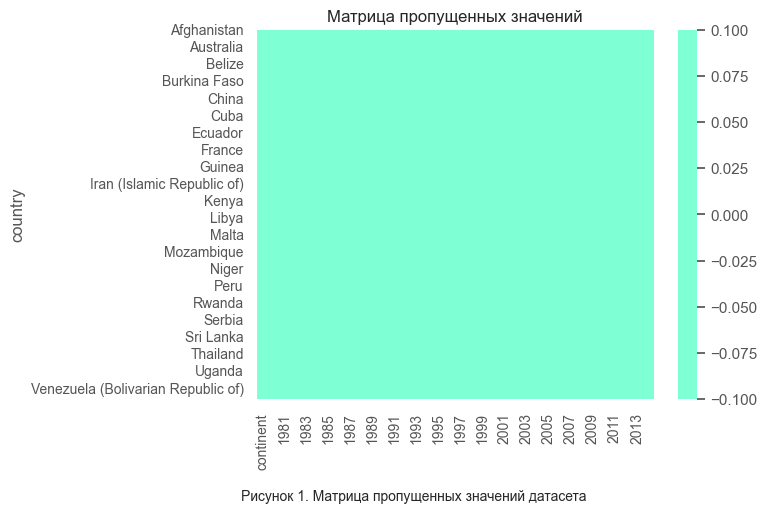


Построенная матрица пропущенных значений подтвержает отсутствие пропусков в датафрейме.


In [67]:
print('Построим матрицу пропущенных значений для полной уверенности в отсутствии пропущенных значений.')
colours=['aquamarine','#7FFFD4']
sns.heatmap(df_migration.isnull(),cmap=sns.color_palette(colours))
plt.title('Матрица пропущенных значений',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.figtext(0.1,-0.1,"Рисунок 1. Матрица пропущенных значений датасета",fontsize=10)
plt.show()
print('\nПостроенная матрица пропущенных значений подтвержает отсутствие пропусков в датафрейме.')

In [68]:
result = []
x=df_migration[df_migration.duplicated()].head()
print('\033[1m'+'г) работа с дубликатами.'+'\033[0m'+f'\n\nВыводим все повторяющиеся значения в колонках:\n{x}.')
for i in [df_migration]:
    print('\nЧисло дубликатов: {}'.format(result.append(i.duplicated().sum())))

г) работа с дубликатами.

Выводим все повторяющиеся значения в колонках:
Empty DataFrame
Columns: [continent, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, total]
Index: []

[0 rows x 36 columns].

Число дубликатов: None


In [69]:
print('\033[1m'+'д) внесение новой колонки "color".'+'\033[0m')
print(f'\nВыводим уникальные значения "continent", для создания словаря, основываясь на мнении И.В.Даля об основных человеческих расах: \n{df_migration.continent.unique()}')
color={'Asia':'Yellow',
'Europe':'White',
'Africa':'Black',
'Oceania':'Brown',
'Latin America and the Caribbean':'Half-breed',
'Northern America':'Red'}
df_migration['color']=df_migration['continent'].map(color)
df_migration.head()

д) внесение новой колонки "color".

Выводим уникальные значения "continent", для создания словаря, основываясь на мнении И.В.Даля об основных человеческих расах: 
['Asia' 'Europe' 'Africa' 'Oceania' 'Latin America and the Caribbean'
 'Northern America']


,continent,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2006,2007,2008,2009,2010,2011,2012,2013,total,color
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,16,39,39,47,71,340,496,741,828,...,3009,2652,2111,1746,1758,2203,2635,2004,58639,Yellow
Albania,Europe,1,0,0,0,0,0,1,2,2,...,856,702,560,716,561,539,620,603,15699,White
Algeria,Africa,80,67,71,69,63,44,69,132,242,...,4807,3623,4005,5393,4752,4325,3774,4331,69439,Black
American Samoa,Oceania,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,6,Brown
Andorra,Europe,0,0,0,0,0,0,2,0,0,...,1,1,0,0,0,0,1,1,15,White



<a href=#2>3.  Исследовательский анализ данных</a><br>
<br>а) средних и абсолютных показателей миграционных потоков в Канаду по континентам;
<br>б) выяснение показателей иммиграции в Канаду из Алжира и построение линейного графика;
<br>в) определение в каждом континенте страны с наибольшим числом мигрировавших в Канаду граждан;
<br>г) построение сводного линейного графика миграции в Канаду из лидирующих по этому показателю стран каждого континента;
<br>д) построение графика «ящик с усами»  для количества мигрантов из Алжира, Египта, Российской Федерации, Китая, Индии и Великобритании;
<br>е) построение диаграммы рассеяния миграции в Канаде и вычисление корреляции между переменными "число мигрантов", "год" и "ввп".


а) рассчёт абсолютных и средних показателей миграционных потоков в Канаду по континентам.

Для этого сгруппируем показатели  иммиграции с 1980 по 2013 гг. и вычислим абсолютные и средние показатели.
Таким образом абсолютное число иммигрантов въехавших в Канаду с 1980 г. по 2013 г. составило:
Северная Америка - 241142 человек;
Азия - 3317794 человек;
Европа - 1410947;
Латинская Америка и бассейн Карибского моря- 765148;
Африка - 618948,
Океания - 3941.
Среднее число иммигрантов въехавших в Канаду с 1980 г. по 2013 г. составило:
Северная Америка - 120571 человек;
Азия - 67710 человек;
Европа - 32813;
Латинская Америка и бассейн Карибского моря- 23186;
Африка - 11462,
Океания - 3941.

Построим круговые диаграммы миграции абсолютной и средней с разбивкой по континентам:


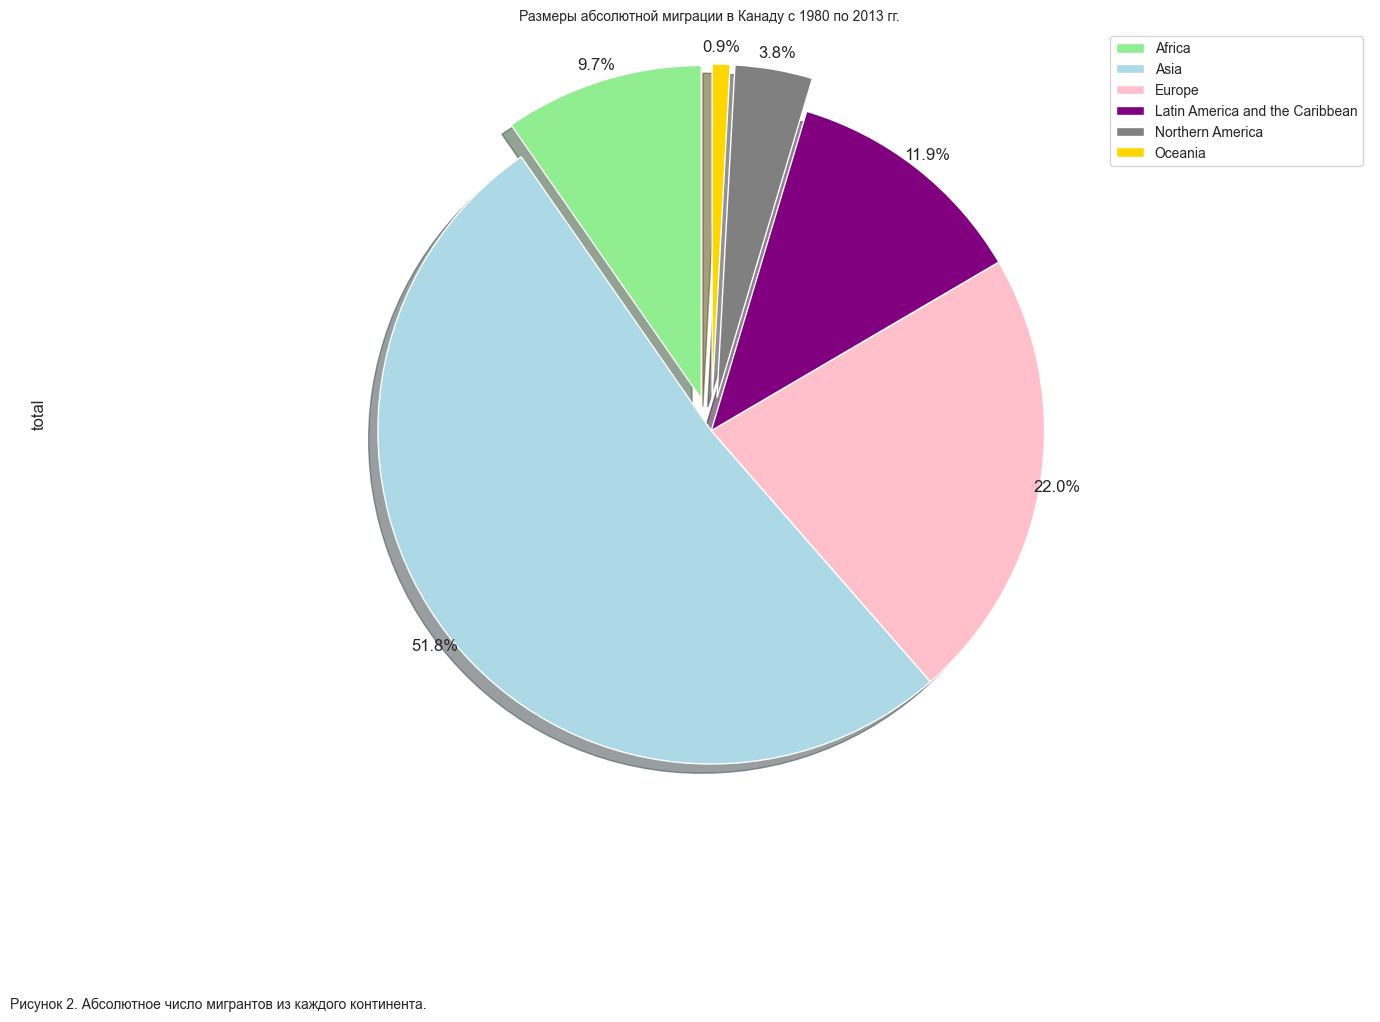

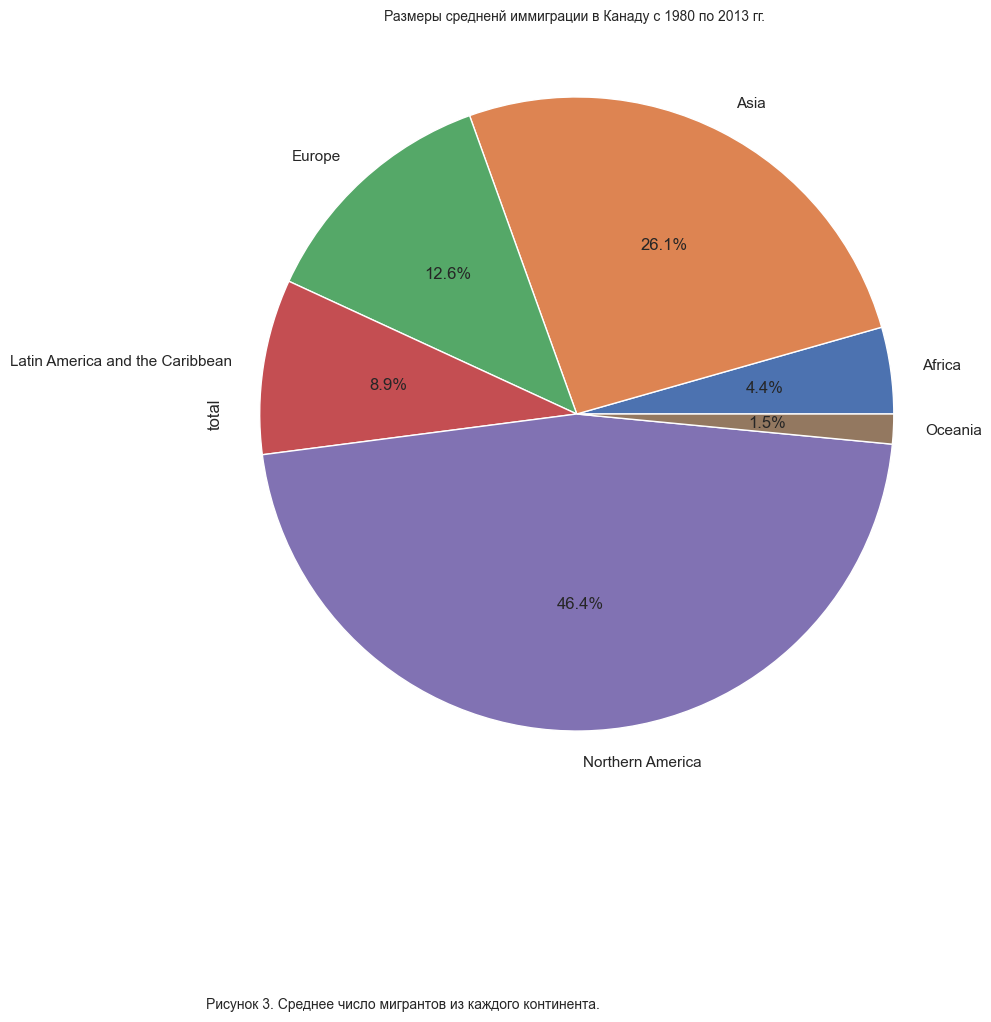

In [89]:
df_migration_mean=df_migration.groupby('continent', axis=0).mean()

na=round(df_migration_mean.loc['Northern America', 'total'])
a=round(df_migration_mean.loc['Asia', 'total'])
e=round(df_migration_mean.loc['Europe', 'total'])
la=round(df_migration_mean.loc['Latin America and the Caribbean', 'total'])
af=round(df_migration_mean.loc['Africa', 'total'])
o=round(df_migration_mean.loc['Oceania', 'total'])

df_migration_sum=df_migration.groupby('continent', axis=0).sum()
na_s=round(df_migration_sum.loc['Northern America', 'total'])
a_s=round(df_migration_sum.loc['Asia', 'total'])
e_s=round(df_migration_sum.loc['Europe', 'total'])
la_s=round(df_migration_sum.loc['Latin America and the Caribbean', 'total'])
af_s=round(df_migration_sum.loc['Africa', 'total'])
o_s=round(df_migration_sum.loc['Oceania', 'total'])
print('\033[1m'+'а) рассчёт абсолютных и средних показателей миграционных потоков в Канаду по континентам.'+'\033[0m'+
'\n\nДля этого сгруппируем показатели  иммиграции с 1980 по 2013 гг. и вычислим абсолютные и средние показатели.')
print(f'Таким образом абсолютное число иммигрантов въехавших в Канаду с 1980 г. по 2013 г. составило:\nСеверная Америка - {na_s} человек;\nАзия - {a_s} человек;\nЕвропа - {e_s};\nЛатинская Америка и бассейн Карибского моря- {la_s};\nАфрика - {af_s},\nОкеания - {o}.')
print(f'Среднее число иммигрантов въехавших в Канаду с 1980 г. по 2013 г. составило:\nСеверная Америка - {na} человек;\nАзия - {a} человек;\nЕвропа - {e};\nЛатинская Америка и бассейн Карибского моря- {la};\nАфрика - {af},\nОкеания - {o}.')
print('\nПостроим круговые диаграммы миграции абсолютной и средней с разбивкой по континентам:')

colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'grey', 'gold']
explode=[0.1, 0, 0, 0, 0.1, 0.1]
df_migration_sum['total'].plot(kind='pie', figsize=(17, 10),
                  autopct = '%1.1f%%', startangle=90,
                  shadow=True, labels=None, pctdistance=1.05, colors=colors, explode = explode)
plt.axis('equal')
plt.title('Размеры абсолютной миграции в Канаду с 1980 по 2013 гг. ',fontsize=10)
plt.legend(labels=df_migration_sum.index, loc='upper right', fontsize=10)
plt.figtext(0.1,-0.1,"Рисунок 2. Абсолютное число мигрантов из каждого континента.",fontsize=10)
plt.show()

df_migration_mean['total'].plot(kind='pie', figsize=(9,10),
                  autopct='%1.1f%%')
plt.axis('equal')
plt.title('Размеры средненй иммиграции в Канаду с 1980 по 2013 гг. ',fontsize=10)
plt.figtext(0.1,-0.1,"Рисунок 3. Среднее число мигрантов из каждого континента.",fontsize=10)
plt.show()


б) выяснение показателей иммиграции в Канаду из Алжира и построение линейного графика.

Выбираем из датафрейма данные по миграции из Алжира с привязкой к годам: 
1980    80
1981    67
1982    71
1983    69
1984    63
Name: Algeria, dtype: object.


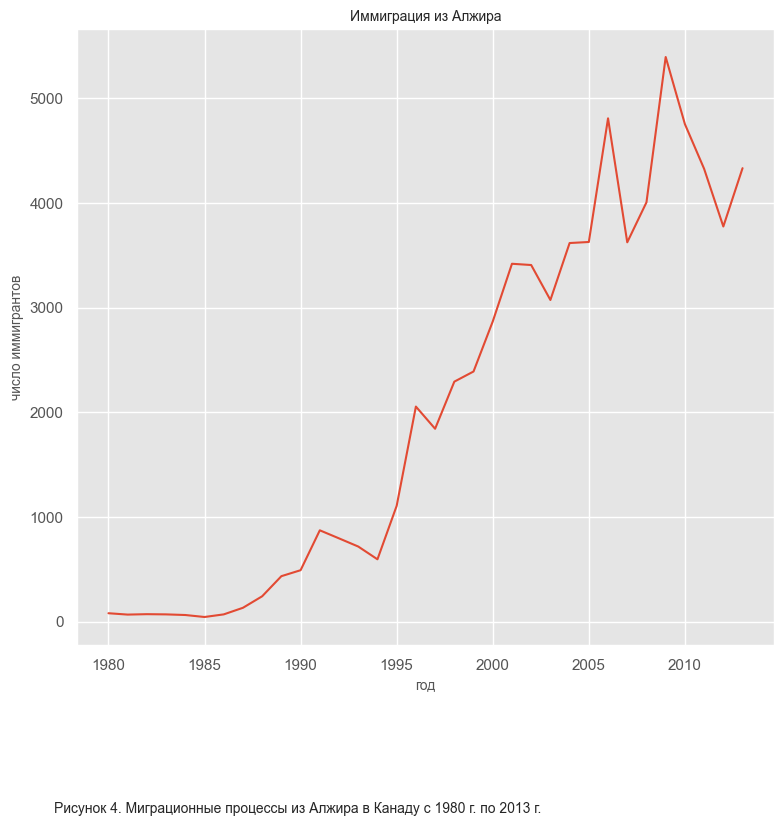

Таким образом, максимальное число эммигрантов из Алжира в Канаду пришлось на 2009 год и составило 5393 человека.


In [71]:
print('\033[1m'+'б) выяснение показателей иммиграции в Канаду из Алжира и построение линейного графика.'+'\033[0m')
print('\nВыбираем из датафрейма данные по миграции из Алжира с привязкой к годам: \n{}.'.format(df_migration.loc['Algeria', '1980':'2013'].head()))
df_migration.loc['Algeria', '1980':'2013'].plot(figsize=(9,8))
plt.title('Иммиграция из Алжира',fontsize=10)
plt.ylabel('число иммигрантов',fontsize=10)
plt.xlabel('год',fontsize=10)
plt.figtext(0.1,-0.1,"Рисунок 4. Миграционные процессы из Алжира в Канаду с 1980 г. по 2013 г.",fontsize=10)
plt.show()
algeria=df_migration.loc['Algeria', '1980':'2013']
algeria_max=df_migration.loc['Algeria', '1980':'2013'].max()
print('Таким образом, максимальное число эммигрантов из Алжира в Канаду пришлось на {} год и составило {} человека.'.format(*algeria[algeria_max==algeria].index, algeria_max))

In [72]:
df_filter_america=df_migration['continent'].isin(['Northern America'])
df_america=df_migration[df_filter_america]
america=df_america.loc[df_america['total'] == df_america['total'].max()]
df_filter_asia=df_migration['continent'].isin(['Asia'])
df_asia=df_migration[df_filter_asia]
asia=df_asia.loc[df_asia['total'] == df_asia['total'].max()]
df_filter_europe=df_migration['continent'].isin(['Europe'])
df_europe=df_migration[df_filter_europe]
europe=df_europe.loc[df_europe['total'] == df_europe['total'].max()]
df_filter_latin=df_migration['continent'].isin(['Latin America and the Caribbean'])
df_latin=df_migration[df_filter_latin]
latin=df_latin.loc[df_latin['total'] == df_latin['total'].max()]
df_filter_africa=df_migration['continent'].isin(['Africa'])
df_africa=df_migration[df_filter_africa]
africa=df_africa.loc[df_africa['total'] == df_africa['total'].max()]
df_filter_oceania=df_migration['continent'].isin(['Oceania'])
df_oceania=df_migration[df_filter_oceania]
oceania=df_oceania.loc[df_oceania['total'] == df_oceania['total'].max()]
print('\033[1m'+'в) определение для каждого континента страны с наибольшим числом мигрировавших в Канаду граждан.'+'\033[0m')
print('\nСоздаем фильтры для каждого континента и применяем их на основном датафрей. Получаем следующие значения:\nСеверная Америка - {}, {} человека;'.format(*america.index, america['total'].max()))
print('Азия - {}, {} человека;'.format(*asia.index, asia['total'].max()))
print('Европа - {}, {} человек;'.format(*europe.index, europe['total'].max()))
print('Латинская Америка и бассейн Карибского моря - {}, {} человек;'.format(*latin.index, latin['total'].max()))
print('Африка - {}, {} человек;'.format(*africa.index, africa['total'].max()))
print('Океания - {}, {} человек.'.format(*oceania.index, oceania['total'].max()))

в) определение для каждого континента страны с наибольшим числом мигрировавших в Канаду граждан.

Создаем фильтры для каждого континента и применяем их на основном датафрей. Получаем следующие значения:
Северная Америка - United States of America, 241122 человека;
Азия - India, 691904 человека;
Европа - United Kingdom, 551500 человек;
Латинская Америка и бассейн Карибского моря - Jamaica, 106431 человек;
Африка - Egypt, 72745 человек;
Океания - Australia, 23829 человек.


г) построение сводного линейного графика миграции в Канаду из лидирующих по этому показателю стран каждого континента.

Для этого объединяем датафреймы из прошлого шага и получаем:
Теперь строим линейных график миграции в Канаду из пяти лидирующих стран.


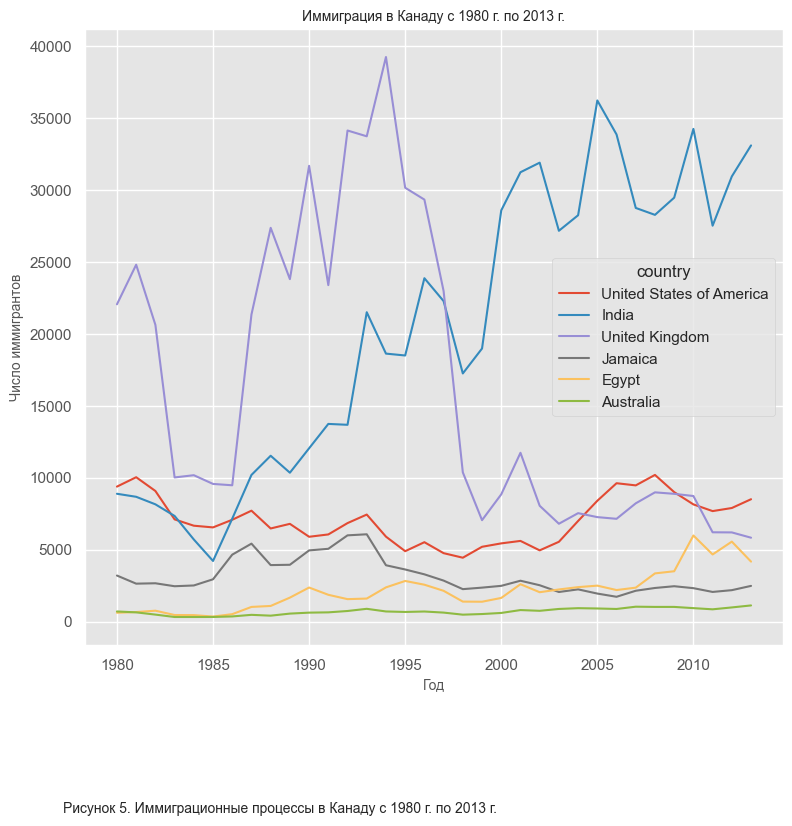

In [73]:
print('\033[1m'+'г) построение сводного линейного графика миграции в Канаду из лидирующих по этому показателю стран каждого континента.'+'\033[0m')
print('\nДля этого объединяем датафреймы из прошлого шага и получаем:')
df_joint=pd.concat([america,asia,europe,latin,africa,oceania],sort=False,axis=0)
df_joint.head()
print('Теперь строим линейных график миграции в Канаду из пяти лидирующих стран.')
df_joint.drop(['continent','total','color'], axis=1, inplace=True)
df_joint.T.plot(figsize=(9,8))
plt.title('Иммиграция в Канаду с 1980 г. по 2013 г.',fontsize=10)
plt.ylabel('Число иммигрантов',fontsize=10)
plt.xlabel('Год',fontsize=10)
plt.figtext(0.1,-0.1,"Рисунок 5. Иммиграционные процессы в Канаду с 1980 г. по 2013 г.",fontsize=10)
plt.show()

д) построение графика «ящик с усами»  для количества мигрантов из Алжира, Египта, Российской Федерации, Китая, Индии и Великобритании.

Делаем выборку по миграции из основного датафрейма для стран Алжир, Египет, Российская Федерация, Китай, Индия и Великобритания. Получаем:
                    1980  1981  1982  1983  1984  1985  1986   1987   1988  \
country                                                                      
Algeria               80    67    71    69    63    44    69    132    242   
Egypt                612   660   755   455   447   348   514   1017   1085   
Russian Federation     0     0     0     0     0     0     0      0      0   
China               5123  6682  3308  1863  1527  1816  1960   2643   2758   
India               8880  8670  8147  7338  5704  4211  7150  10189  11522   

                     1989  ...   2004   2005   2006   2007   2008   2009  \
country                    ...                                             
Algeria               434 

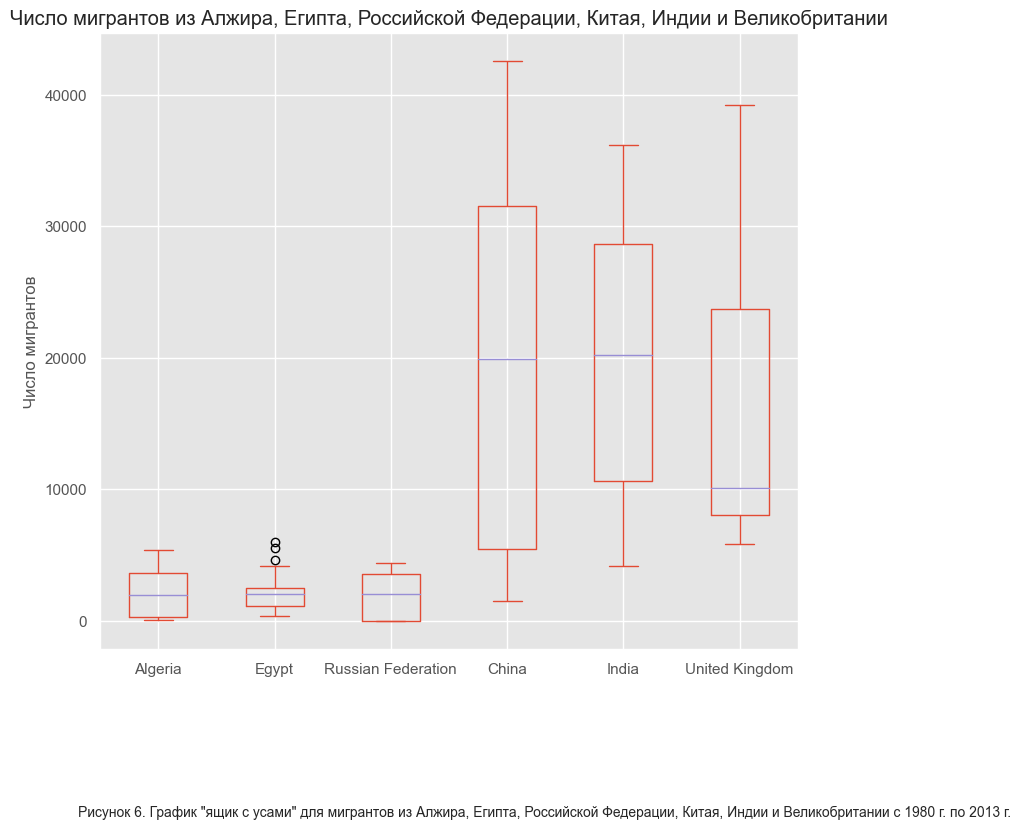

In [74]:
new_joint=df_migration.loc[['Algeria', 'Egypt', 'Russian Federation','China','India','United Kingdom'], '1980':'2013']
x=new_joint.head()

print('\033[1m'+'д) построение графика «ящик с усами»  для количества мигрантов из Алжира, Египта, Российской Федерации, Китая, Индии и Великобритании.'+'\033[0m')
print(f'\nДелаем выборку по миграции из основного датафрейма для стран Алжир, Египет, Российская Федерация, Китай, Индия и Великобритания. Получаем:\n{x}')
new_joint.T.plot(kind='box', figsize=(9, 8))
plt.title('Число мигрантов из Алжира, Египта, Российской Федерации, Китая, Индии и Великобритании')
plt.ylabel('Число мигрантов')
plt.figtext(0.1,-0.1,'Рисунок 6. График "ящик с усами" для мигрантов из Алжира, Египта, Российской Федерации, Китая, Индии и Великобритании с 1980 г. по 2013 г.',fontsize=10)

print('\nТаким образом, взяв группу из стран со средней миграцией и высокой миграцией, видно, что показатели Великобритании выбиваются из общей массы. Возможно на решение британцев к переселению в Канаду повлияла ситуация, сложившаяся в Северной Ирландии. Кроме того, в выборке Египта присутствуют вбросы.')

е) построение диаграммы рассеяния миграции в Канаде и вычисление корреляции между переменными "число мигрантов", "год" и "ввп".

Создаем отдельный датафрейм, состоящий из 2 колонок "год" и "всего":
   year   total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

Далее строим диограмму рассеяния:


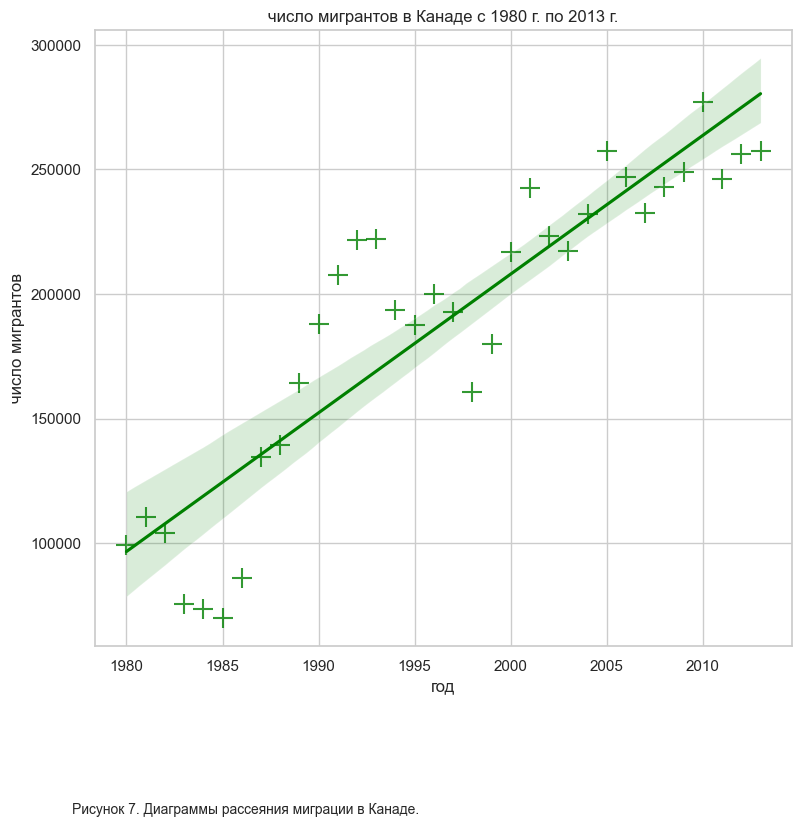


На диаграмме рассеяния явно прослеживается линейная зависимость числа мигрантов от года.

Выясним коррелируются ли переменные "год", "число мигрантов"  и "ввп" с помощью коэффициента корреляции Пирсона:
           year     total       gdp
year   1.000000  0.896899  0.928327
total  0.896899  1.000000  0.795861
gdp    0.928327  0.795861  1.000000

Для этого в датафрейм "total_year" добавляем колонку "gdp":
   year   total     gdp
0  1980   99137  273.85
1  1981  110563  306.21
2  1982  104271  313.51
3  1983   75550  340.55
4  1984   73417  355.37

Большая зависимость наблюдается между "годом","числом мигрантов" и , что также прослеживалось и выше. А вот зависимости "числа мигрантов" от "ввп" Канады не наблюдается.

Построим график корелляции между "total" и "year":


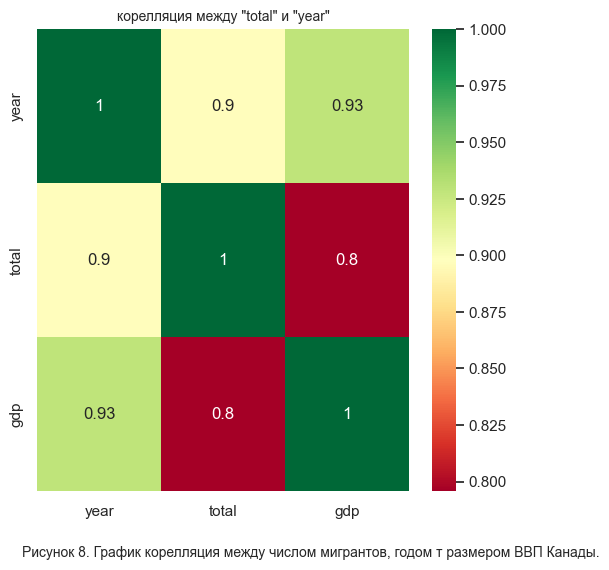

In [75]:
gdp={1980:273.85,1981:306.21,1982:313.51,1983:340.55,1984:355.37,1985:364.76,1986:377.44,1987:431.32,1988:507.35,1989:565.06,
1990:593.93,1991:610.33,1992:592.39,1993:577.17,1994:578.14,1995:604.03,1996:628.55,1997:654.99,1998:634.00,1999:678.41,
2000:744.77,2001:738.98,2002:760.65,2003:895.54,2004:1026.69,2005:1173.11,2006:1319.26,2007:1468.82,2008:1552.99,2009:1374.63,
2010:1617.34,2011:1793.33,2012:1828.37,2013:1846.60}
total_year = pd.DataFrame(df_migration.loc[:,'1980':'2013'].sum(axis=0))
total_year.index = map(int, total_year.index)
total_year.reset_index(inplace=True)
total_year.columns = ['year', 'total']
total_gdp=total_year.copy()
total_gdp['gdp']=total_gdp['year'].map(gdp)
total_gdp.reset_index()
print('\033[1m'+'е) построение диаграммы рассеяния миграции в Канаде и вычисление корреляции между переменными "число мигрантов", "год" и "ввп".'+'\033[0m')
print('\nСоздаем отдельный датафрейм, состоящий из 2 колонок "год" и "всего":\n{}'.format(total_year.head()))
print('\nДалее строим диограмму рассеяния:')
plt.figure(figsize=(9, 8))
sns.set(font_scale=1.0)
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=total_year, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='год', ylabel='число мигрантов')
ax.set_title('число мигрантов в Канаде с 1980 г. по 2013 г.')
plt.figtext(0.1,-0.1,'Рисунок 7. Диаграммы рассеяния миграции в Канаде.',fontsize=10)
plt.show()
print('\nНа диаграмме рассеяния явно прослеживается линейная зависимость числа мигрантов от года.')
print('\nВыясним коррелируются ли переменные "год", "число мигрантов"  и "ввп" с помощью коэффициента корреляции Пирсона:\n{}'.format(total_gdp.corr(method='pearson')))
print('\nДля этого в датафрейм "total_year" добавляем колонку "gdp":\n{}'.format(total_gdp.head()))
print('\nБольшая зависимость наблюдается между "годом","числом мигрантов" и , что также прослеживалось и выше. А вот зависимости "числа мигрантов" от "ввп" Канады не наблюдается.')
print('\nПостроим график корелляции между "total" и "year":')
corrValues=total_gdp.corr(method='pearson')
topCorrFeaturesForEarnig=corrValues.index[abs(corrValues['total'])>=0.1]
plt.figure(figsize=(6,6))
plt.xlabel('log(year)',fontsize=10)
plt.ylabel('year',fontsize=10)
plt.title('корелляция между "total" и "year"',fontsize=10)
plt.figtext(0.1,0,'Рисунок 8. График корелляция между числом мигрантов, годом т размером ВВП Канады.',fontsize=10)
ax=sns.heatmap(total_gdp[topCorrFeaturesForEarnig].corr(),annot=True,cmap="RdYlGn")

In [76]:
value,number=st.normaltest(df_migration.loc[:,'1980':'2013'].sample(axis=1))
print(value,number)
if number>=0.05:
    print('Данные по миграции распределены нормально')
else:
    print('Маловероятно, что данные по миграции распределены нормально.')

[276.39667992] [9.57686902e-61]
Маловероятно, что данные по миграции распределены нормально.


<a href=#3>4.  Построение интерактивной карты миграции в Канаду с привязкой к странам</a><br>

In [77]:
print('Для построение карты миграции в Канаду прежде всего создаем отдельный файл "world_countries.json", в котором прописаны границы стран.\nСтроим интерактивную карту.')
print('(чем страна окрашена в более темный цвет, тем большее число людей из нее мигрировало в Канаду. Черный цвет обозначает отсутствие данных.)')
wc=r'world_countries.json'
world = folium.Map(location=[0,0], zoom_start=2, tiles='cartodbpositron')
choropleth = folium.Choropleth(geo_data=wc,
    data=df_map,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Миграция в Канаду',
).add_to(world)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=False))
world

Для построение карты миграции в Канаду прежде всего создаем отдельный файл "world_countries.json", в котором прописаны границы стран.
Строим интерактивную карту.
(чем страна окрашена в более темный цвет, тем большее число людей из нее мигрировало в Канаду. Черный цвет обозначает отсутствие данных.)


<a href=#4>5.  Исследование статистических показателей</a><br>
<br>а) построение диаграммы с областями;
<br>б) построение гистограммы с числом мигрантов за определенный год;
<br>в) построение пузырьковой диаграммы миграции в Канаду из Китая и Индии;
<br>г) построить график миграции из Великобритании в Канаду с 1980 г. по 2013 г.

a) построение диаграммы с областями.

Создадим отдельный датафрейм со странами, из которых в Канаду выехало максимальное количество человек.

country  India  China  United Kingdom  Philippines
1980      8880   5123           22045         6051
1981      8670   6682           24796         5921
1982      8147   3308           20620         5249
1983      7338   1863           10015         4562
1984      5704   1527           10170         3801


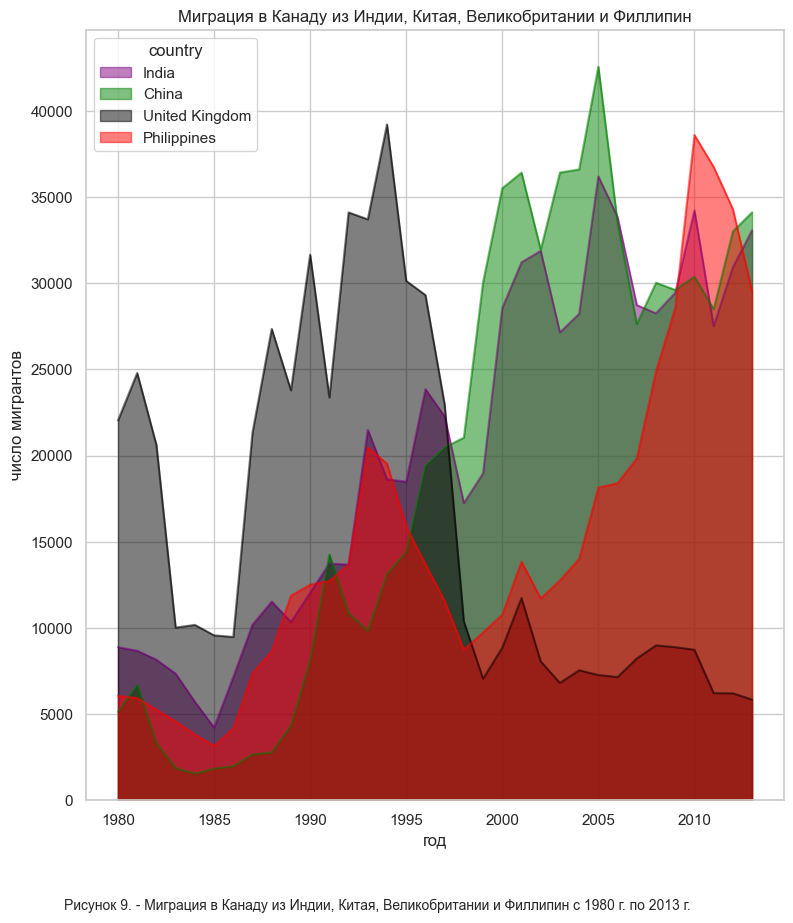

In [78]:
top = df_migration.loc[['India', 'China', 'United Kingdom', 'Philippines'], '1980':'2013']
top = top.T
print('\033[1m'+'a) построение диаграммы с областями.'+'\033[0m'+'\n\nСоздадим отдельный датафрейм со странами, из которых в Канаду выехало максимальное количество человек.\n\n{}'.format(top.head()))
colors = ['purple', 'green', 'black', 'red']
top.plot(kind='area', stacked=False, figsize=(9, 10), color=colors)
plt.title('Миграция в Канаду из Индии, Китая, Великобритании и Филлипин')
plt.ylabel('число мигрантов')
plt.xlabel('год')
plt.figtext(0.1,0,'Рисунок 9. - Миграция в Канаду из Индии, Китая, Великобритании и Филлипин c 1980 г. по 2013 г.',fontsize=10)
plt.show()


б) построение гистограммы с числом мигрантов за определенный год.


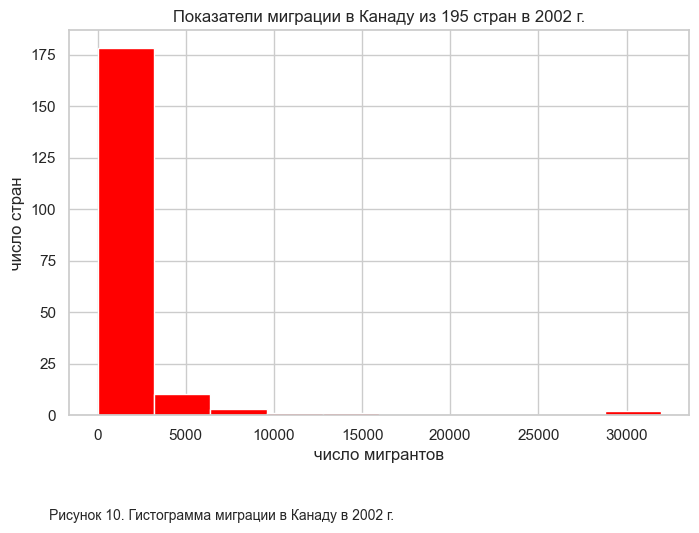


Из данных гистораммы по распределению видно, что число мигрантов в 2002 г. в канаду из большинства стран составило от 0 до примерно 3 тысяч человек. Из нескольких стран въехало до 10 тысяч человек. Кроме того, из одной страны въехало чуть больше 25 тысяч.


In [79]:
print('\033[1m'+'б) построение гистограммы с числом мигрантов за определенный год.'+'\033[0m')
df_migration['2002'].plot(kind='hist',color='red', figsize=(8,5))
plt.title('Показатели миграции в Канаду из 195 стран в 2002 г.')
plt.ylabel('число стран')
plt.xlabel('число мигрантов')
plt.figtext(0.1,-0.1,'Рисунок 10. Гистограмма миграции в Канаду в 2002 г.',fontsize=10)
plt.show()
print('\nИз данных гистораммы по распределению видно, что число мигрантов в 2002 г. в канаду из большинства стран составило от 0 до примерно 3 тысяч человек. Из нескольких стран въехало до 10 тысяч человек. Кроме того, из одной страны въехало чуть больше 25 тысяч.')

в) построение пузырьковой диаграммы миграции в Канаду из Китая и Индии.

Для этого немного трансформируем датафрейм:
country  Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
1980              16        1       80               0        0       1   
1981              39        0       67               1        0       3   
1982              39        0       71               0        0       6   
1983              47        0       69               0        0       6   
1984              71        0       63               0        0       4   

country  Antigua and Barbuda  Argentina  Armenia  Australia  ...  \
1980                       0        368        0        702  ...   
1981                       0        426        0        639  ...   
1982                       0        626        0        484  ...   
1983                       0        241        0        317  ...   
1984                      42        237        0        317  ...   

country  United States 

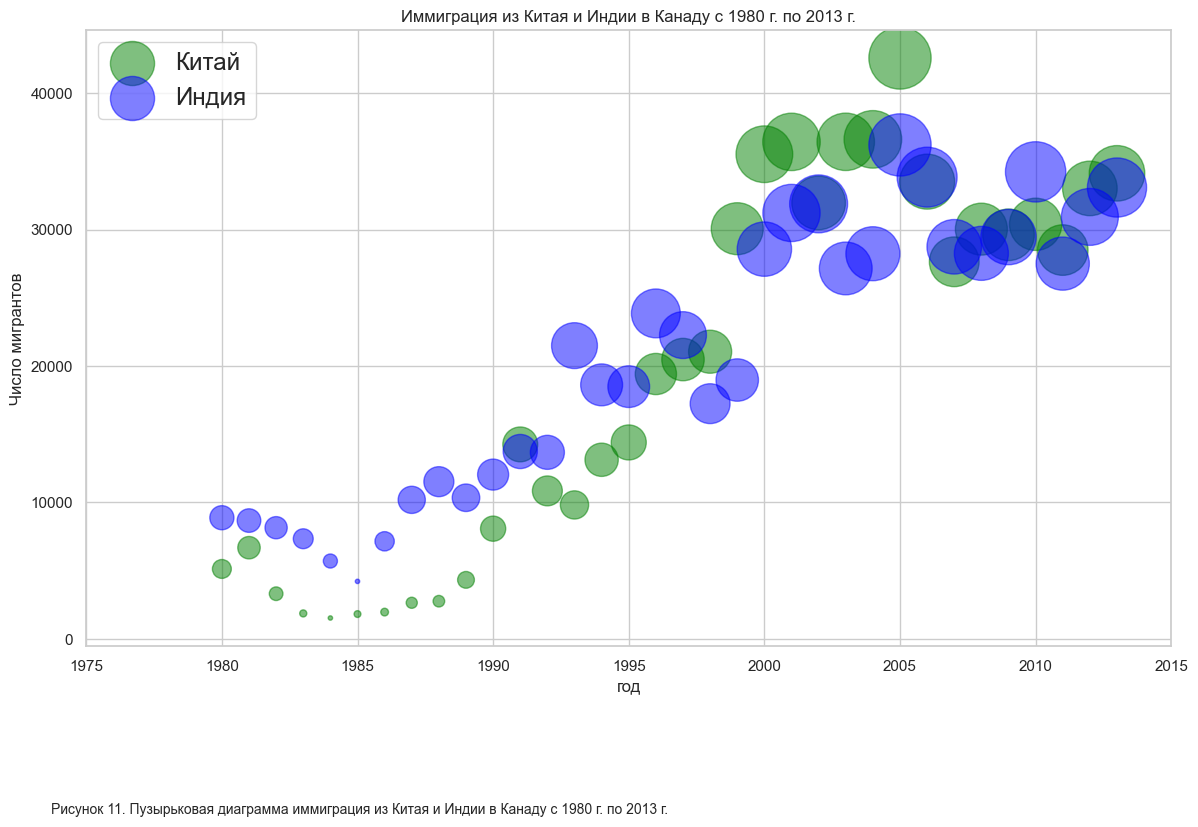

In [80]:
print('\033[1m'+'в) построение пузырьковой диаграммы миграции в Канаду из Китая и Индии.'+'\033[0m')
years = list(map(str, range(1980, 2014)))
df_can_t = df_migration[years].transpose()
df_can_t.index = map(int, df_can_t.index)
print('\nДля этого немного трансформируем датафрейм:\n{}'.format(df_can_t.head()))
df_can_t.index.name = 'год'
df_can_t.reset_index(inplace=True)
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())


ax0 = df_can_t.plot(kind='scatter',
                        x='год',
                        y='China',
                        figsize=(14, 8),
                        alpha=0.5,                  
                        color='green',
                        s=norm_china * 2000 + 10,  
                        xlim=(1975, 2015)
                       )


ax1 = df_can_t.plot(kind='scatter',
                        x='год',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india * 2000 + 10,
                        ax = ax0
                       )

ax0.set_ylabel('Число мигрантов')
ax0.set_title('Иммиграция из Китая и Индии в Канаду с 1980 г. по 2013 г.')
ax0.legend(['Китай', 'Индия'], loc='upper left', fontsize='x-large')
plt.figtext(0.1,-0.1,'Рисунок 11. Пузырьковая диаграмма иммиграция из Китая и Индии в Канаду с 1980 г. по 2013 г.',fontsize=10)
print('\nПостроим пузырьковую диаграмму для таких стран, как Китай и Индия.')

г) построить график миграции из Великобритании в Канаду с 1980 г. по 2013 г.


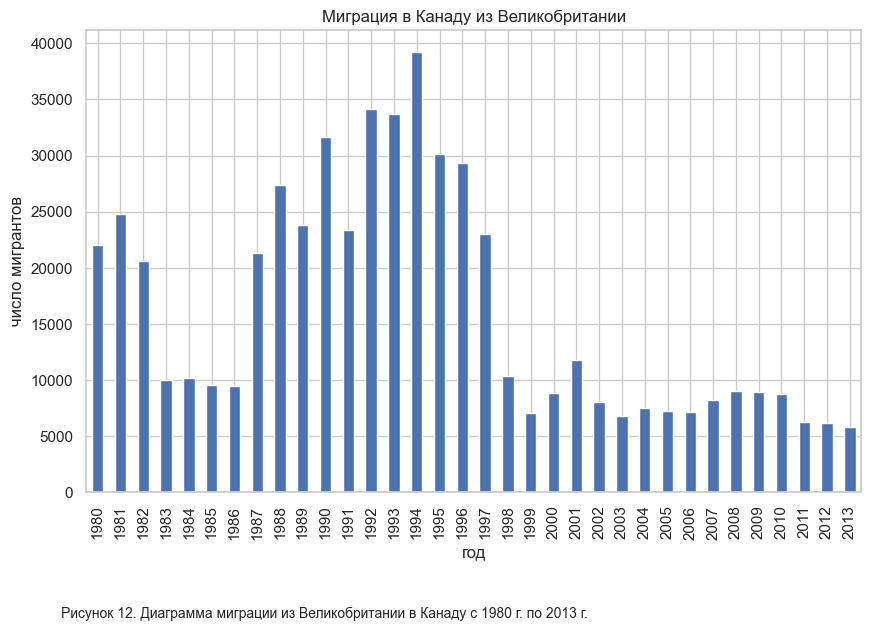


На диаграмме выше хорошо прослеживается значительное увеличение миграционного потока из Великобритании в Канаду с 1987 г. по 1997 г. Таким образом, визуально подтверждается гипотеза о сильном влиянии неких внешних факторов на решение людей уехать из Великобритании. Возможно одной из таких причин стала борьба М.Тетчер с "угольщика".


In [81]:
print('\033[1m'+'г) построить график миграции из Великобритании в Канаду с 1980 г. по 2013 г.'+'\033[1m')
uk = df_migration.loc['United Kingdom', years]
uk.plot(kind='bar', figsize = (10, 6))
plt.xlabel('год') 
plt.ylabel('число мигрантов') 
plt.title('Миграция в Канаду из Великобритании')
plt.figtext(0.1,-0.1,'Рисунок 12. Диаграмма миграции из Великобритании в Канаду с 1980 г. по 2013 г.',fontsize=10)
plt.show()
print('\nНа диаграмме выше хорошо прослеживается значительное увеличение миграционного потока из Великобритании в Канаду с 1987 г. по 1997 г. Таким образом, визуально подтверждается гипотеза о сильном влиянии неких внешних факторов на решение людей уехать из Великобритании. Возможно одной из таких причин стала борьба М.Тетчер с "угольщика".')

<a href=#5>6.  Проверка гипотез.</a><br>
<br>а) H0: Средние показатели миграции из Азии и Европы одинаковые.
<br>H1:Средние показатели миграции из Азии и Европы разные.

а) H0: Средние показатели миграции из Азии и Европы одинаковые.
H1:Средние показатели миграции из Азии и Европы разные.

Вычисляем средние показатели (округлены до целых чисел) миграции из Азии - 67710 человек и Европы - 32813 человек.

Средние показатели миграции из Азии и Европы различны.
Дисперсии двух датафреймов различны.

Теперь для визуального отображения построим гистограмму и график плотности распределения миграции из Азии и Европы. Для этого сформируем два датафрейма с числом мигрантов по годам:
country
Afghanistan    58639
Armenia         3310
Azerbaijan      2649
Bahrain          475
Bangladesh     65568
Name: total, dtype: int64

country
Albania    15699
Andorra       15
Austria     4985
Belarus     7975
Belgium    10762
Name: total, dtype: int64

Теперь построим две гистограммы.


C:\Users\joker\AppData\Local\Temp\ipykernel_3368\2187550044.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(asia1,color='y')


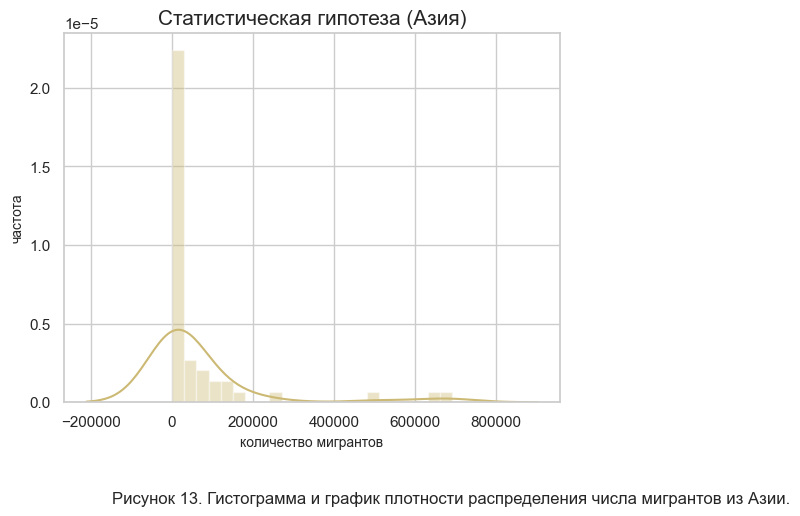

C:\Users\joker\AppData\Local\Temp\ipykernel_3368\2187550044.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(europe1,color='b')


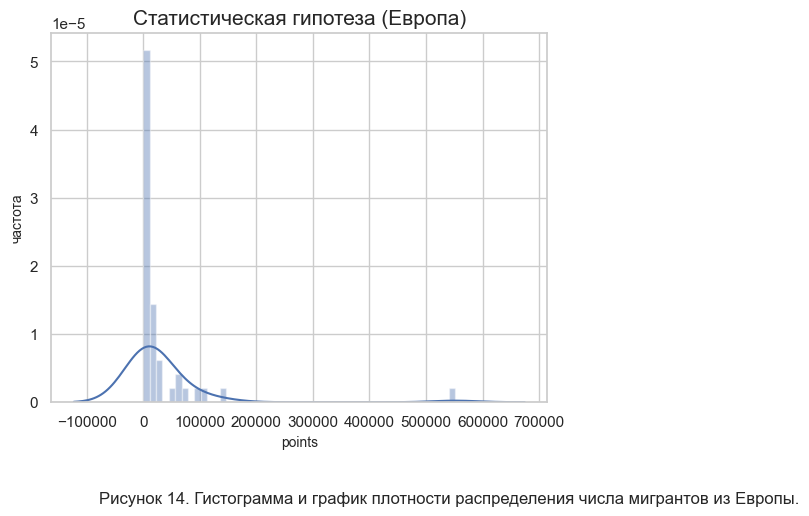

p-значение: 0.17694688470098713
Не получилось отклонить нулевую гипотезу


In [82]:
print('\033[1m'+'а) H0: Средние показатели миграции из Азии и Европы одинаковые.\nH1:Средние показатели миграции из Азии и Европы разные.'+'\033[0m')
total_mean=df_migration.groupby(['continent']).mean()['total'].sort_values(ascending=False)
asia_mean=round(total_mean.loc['Asia'])
europe_mean=round(total_mean.loc['Europe'])
print(f'\nВычисляем средние показатели (округлены до целых чисел) миграции из Азии - {asia_mean} человек и Европы - {europe_mean} человек.')
if asia_mean==europe_mean:
    print('\nСредние показатели миграции из Азии и Европы одинаковые.')
else:
    print('\nСредние показатели миграции из Азии и Европы различны.')
asia1=df_migration[df_migration.continent=='Asia']['total']
europe1=df_migration[df_migration.continent=='Europe']['total']
if np.var(asia1)==np.var(europe1):
    print('Дисперсии двух датафреймов равны.')
else:
    print('Дисперсии двух датафреймов различны.')
print('\nТеперь для визуального отображения построим гистограмму и график плотности распределения миграции из Азии и Европы. Для этого сформируем два датафрейма с числом мигрантов по годам:\n{}\n\n{}'.
format(asia1.head(), europe1.head()))
print('\nТеперь построим две гистограммы.')
sns.distplot(asia1,color='y')
plt.title("Статистическая гипотеза (Азия)",fontsize=15)
plt.ylabel('частота',fontsize=10)
plt.xlabel('количество мигрантов',fontsize=10)
plt.figtext(0.2,-0.1,"Рисунок 13. Гистограмма и график плотности распределения числа мигрантов из Азии.")
plt.show()
sns.distplot(europe1,color='b')
plt.title("Статистическая гипотеза (Европа)",fontsize=15)
plt.ylabel('частота',fontsize=10)
plt.xlabel('points',fontsize=10)
plt.figtext(0.2,-0.1,"Рисунок 14. Гистограмма и график плотности распределения числа мигрантов из Европы.")
plt.show()
plt.show()
alpha= .05
from scipy import stats as st
import scipy
results=scipy.stats.ttest_ind(asia1,europe1,equal_var=False)
print('p-значение:',results.pvalue)
if(results.pvalue<alpha):
    print("Отклоняем нулевую гипотезу")
else:
    print("Не получилось отклонить нулевую гипотезу")


<a href=#6>7.  Выводы</a><br>

Лидиром по количеству въехавших в Канаду является азиатский континет, что возможно сопряжено с количеством проживающих там жителей (Китай и Индия являются мировыми лидерами по числу граждан, поведеньчиский паттерн в области миграции в Канаду и их жителей почти одинаков), а также с экономическим ростом, что приводит к увеличению дохота и поиску новых, более "цивилизованных" мест для проживания. Средние же показатели миграции лидерство отдают Северной Америке. Такие показатели могут быть обусловлены географической близостью и количеству стран относящихся к североамериканскому континенту. Пропорция 2 к 1 в соотношении въехавших из Европы и Азии сохраняется.

При детальном анализе датасета была выявлена линейная зависимость между годом и общим числом въехавших, однако зависимость между размером ВВП Канады и числом мигрантов явно слабее, чем зависимости "год-число мигрантов", "год-ввп". Кроме того, на примере графика миграции из 6 стран (континентальные лидеры по числу мигрантов прибывших в Канаду) видны признаки цикличности процесса, а также ненорамльность миграции из Великобритании, которая еще яснее видна на расположении линии медианы на графике "ящик с усами" (данная линия находится в низу "ящика", что абсолютно не характерно для 5 других стран). При дальнейшем рассмотрении это подтвердилось во время визуализации миграции из Великобритании в Канаду с погодовой разбивкой. Всплеск выезда из Соединенного Королевства пришелся на правление М.Тетчер, которая достаточно жестко переводила экономику страны с угольной зависимости, что возможно послужило основанием для начала отрицательно роста макроэкономических показателей Лондона. Однако для проверки этой терии в датасете информации недостаточно.

При сопоставлении средних показателей миграции из Азии и Европы гипотеза о их различности не подтвердилась, что возможно характерно и при сопоставлении уровня средней миграции всех континентов. 

Таким образом, можно констатировать, что набор данных, содержащий информацию о миграционных потоках в Канаду, составлен достаточно качественно. В нем ясно прослеживаются определенные тренды и зависимости, однако сделать более глубокий анализ именно о причинах такого миграционного паттерна со стороны жителей других стран не представляется возможным. 

<br>
<br>
<br><center>Список литературы</center>
<br>1. Андерсон, К, Аналитическая культура: от сбора данных до бизнес-результатов / Карл Андерсон. - Москва : Манн, Иванов и Фербер, 2017. - 324 с.
<br>2. Бенгфорт Бенджамин, Билбро Ребекка, Охеда Тони, Прикладной анализ текстовых данных на Python. Машинное обучение и создание приложений обработки естественного языка. — СПб.: Питер, 2019. 
<br>3. Мэтиз Э., Изучаем Python. Программирование игр, визуализация данных, веб-приложения. — СПб.: Питер, 2017. 
<br>4.  Плас Дж. Вандер, Python для сложных задач: наука о данных и машинное обучение. — СПб.: Питер, 2018.
<br>5. Рашка С., Рашка С. Р28 Python и машинное обучение / пер. с англ. А. В. Логунова. - М.: ДМК Пресс, 2017.  
<br>6.  Шарден Б., Массарон Л., Боскетти А.,  Крупномасштабное машинное обучение вместе с Python. Пер. с анг. А. В. Логунова. – М.: ДМК Пресс, 2018. 
